# Bike Sharing Assignment

## Multiple Linear Regression

### Problem Statement

The Bike Sharing company needs to understand the factors on which the demand for their shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Therefore, the model will be a good way for management to understand the demand dynamics of a new market. 


### Step 1: Reading and Understanding the Data
To import numpy and pandas and read the dataset

In [1]:
import numpy as np
import pandas as pd

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv(r"E:\Ashima\PGDML\Bike Sharing Assignment\day.csv")

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of dataframe

In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### Boxplot representing relationship between different categorical variables on target variable 'cnt'

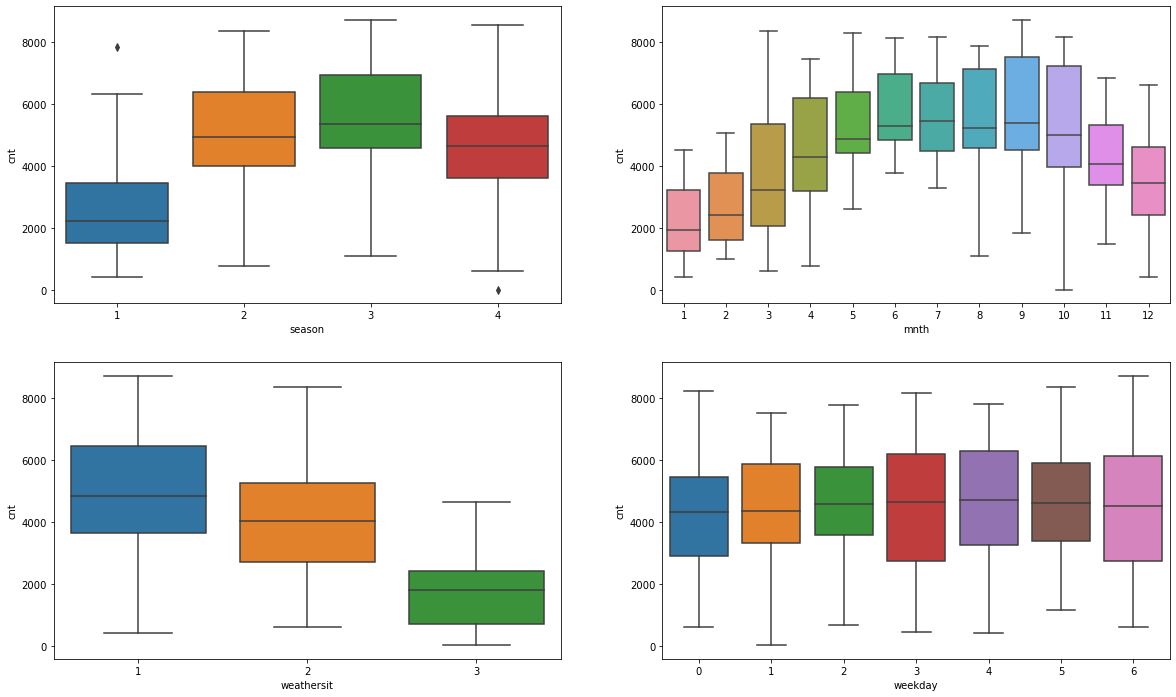

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,2,4)
#sns.boxplot(x = 'yr', y = 'cnt', data = bike)
#plt.subplot(2,3,5)
#sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
#plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()

### To drop unnecessary columns from dataframe

In [9]:
# Rechecking all the columns
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
# dropping the columns as per our business requirements.
# where 'instant' is index record, 'date' on which the particular data is recorded, 
#'casual' and 'registered' are already together given in 'cnt' variable
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [11]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Pair-Plot of numerical variables

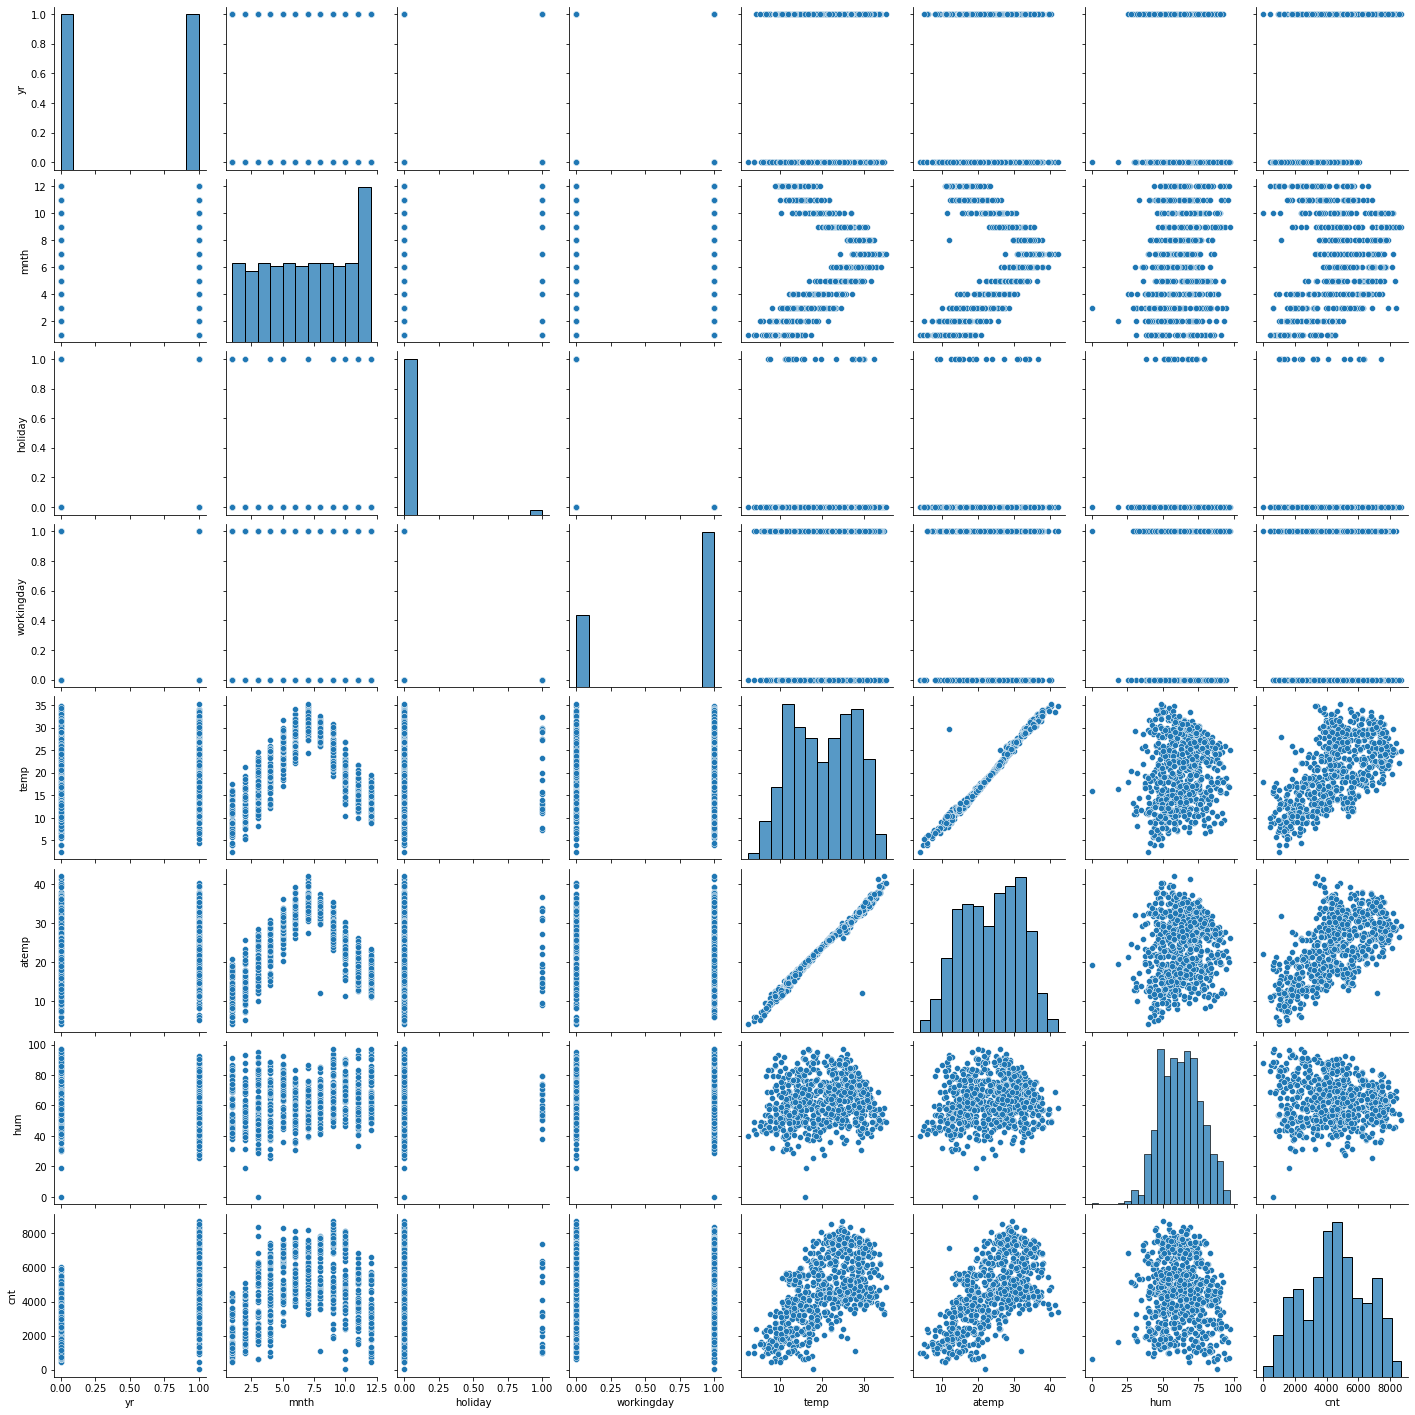

In [12]:
bike_num = bike[['yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'cnt']]
sns.pairplot(bike_num)

In [13]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step 3: Data Preparation
We have some catagorical variables(as described in data dictionary). These categorical variables present as numerical variables in dataset.
We have to convert numerical variables back to categorical variables using data dictionary so that further dummy variables can be formed.

In [14]:
#1.working on season variable

#Data dictionary: season (1:spring, 2:summer, 3:fall, 4:winter)

season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike['season'] = bike['season'].map(season_map)

In [15]:
#2. working on month variable

#Data dictionary: mnth : month ( 1 to 12)

bike['mnth'] = bike['mnth'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
#3. working on weathersit variable

#Data Dictionary: weathersit : 
        #- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        #- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        #- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        #- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike['weathersit']=bike['weathersit'].map({1:'Clear_Partly_Cloudy', 2:'Mist_Cloudy', 3:'Light_Snow_Rain', 4:'Heavy_Snow_Rain'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,6,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,0,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,1,1,Clear_Partly_Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,2,1,Clear_Partly_Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,3,1,Clear_Partly_Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
#4. working on weekday variable

#Data Dictionary: weekday : day of the week'
bike['weekday'] = bike['weekday'].map({6: 'Monday', 0:'Tuesday', 1: 'Wednesday', 2: 'Thursday', 3: 'Friday', 4: 'Saturday', 5: 'Sunday'})

In [18]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Partly_Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Partly_Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Partly_Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Dummy Variables
- The variable season has four levels.
- The variable month has twelve levels.
- The variable weathersit has four levels.

For n levels of variables, we should have (n-1) dummy variables

In [20]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'dm_1'
dm_1 = pd.get_dummies(bike['season'])

In [21]:
# Check what the dataset 'dm_1' looks like
dm_1.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we don't need four columns. We can drop the fall column, as the season can be identified with just the last three columns.

In [22]:
# Let's drop the first column from dm_1 df using 'drop_first = True'

dm_1 = pd.get_dummies(bike['season'], drop_first = True)
dm_1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [23]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'dm_2'
dm_2 = pd.get_dummies(bike['mnth'])

In [24]:
# Check what the dataset 'dm_2' looks like
dm_2.head()

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
# Let's drop the first column from dm_1 df using 'drop_first = True'

dm_2 = pd.get_dummies(bike['mnth'], drop_first = True)

In [26]:
dm_2.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [27]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'dm_3'
dm_3 = pd.get_dummies(bike['weathersit'])

In [28]:
# Check what the dataset 'dm_3' looks like
dm_3.head()

,Clear_Partly_Cloudy,Light_Snow_Rain,Mist_Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [29]:
# Let's drop the first column from dm_3 df using 'drop_first = True'

dm_3 = pd.get_dummies(bike['weathersit'], drop_first = True)

In [30]:
dm_3.head()

,Light_Snow_Rain,Mist_Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [31]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'dm_4'
dm_4 = pd.get_dummies(bike['weekday'])

In [32]:
# Check what the dataset 'dm_3' looks like
dm_4.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


In [33]:
# Let's drop the first column from dm_4 df using 'drop_first = True'

dm_4 = pd.get_dummies(bike['weekday'], drop_first = True)

In [34]:
dm_4.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [35]:
# Add the results (dm_1,dm_2 and dm_3) to the original bike dataframe

bike = pd.concat([bike, dm_1, dm_2, dm_3,dm_4], axis = 1)

In [36]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,October,September,Light_Snow_Rain,Mist_Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,January,0,Monday,0,Mist_Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,spring,0,January,0,Tuesday,0,Mist_Cloudy,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,spring,0,January,0,Wednesday,1,Clear_Partly_Cloudy,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,January,0,Thursday,1,Clear_Partly_Cloudy,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,January,0,Friday,1,Clear_Partly_Cloudy,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#Dropping season, mnth, weathersit, weekday as dummy variables have been created for these features.

bike.drop(['season', 'mnth', 'weathersit', 'weekday'], axis = 1, inplace = True)

In [38]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Light_Snow_Rain,Mist_Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Light_Snow_Rain', 'Mist_Cloudy', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [40]:
bike.shape

(730, 30)

### Step 4: Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split

In [41]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling

2. Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Light_Snow_Rain,Mist_Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Apply scaler() to all the columns except the 'dummy' variables and binary variables
scale_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_train[scale_vars] = scaler.fit_transform(bike_train[scale_vars])

In [46]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Light_Snow_Rain,Mist_Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,1,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,1,0,0,0,0,0


In [47]:
bike_train.shape

(510, 30)

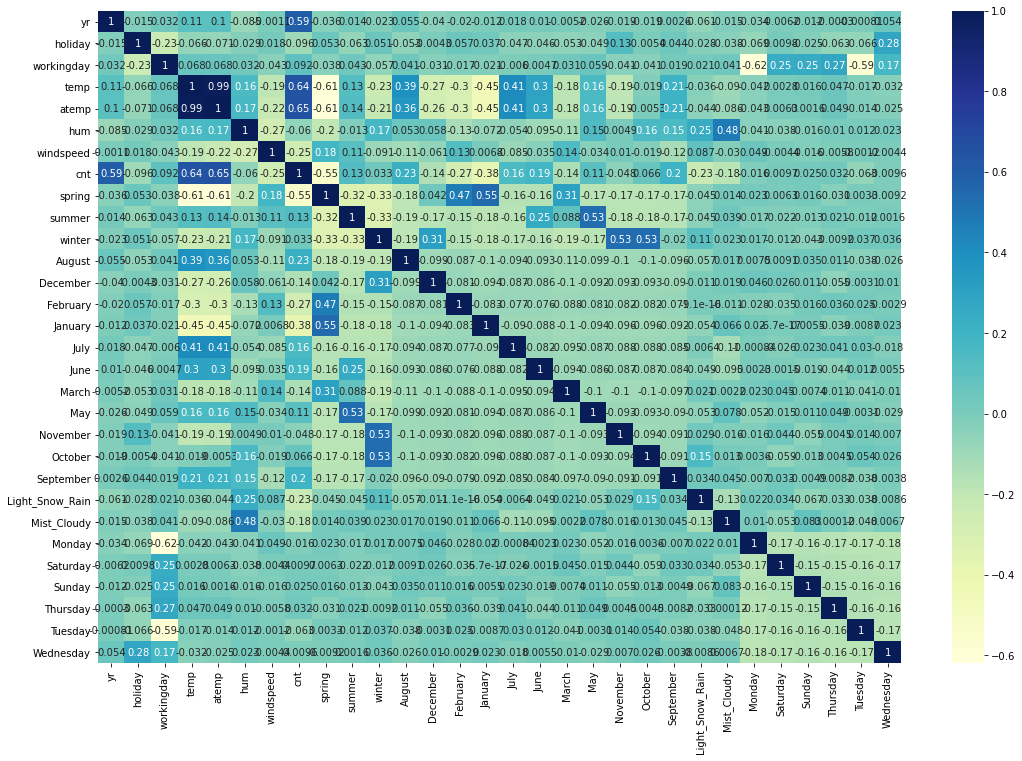

In [48]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (18, 12))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

In [49]:
#bike_train.drop(['temp'], axis=1, inplace = True)

In [50]:
bike_train.shape

(510, 30)

### Dividing X and Y sets for the model building

In [51]:
y_train = bike_train.pop('cnt')
X_train = bike_train

# Model 1

### Step 5: Building a linear model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default

In [52]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [53]:
# Check the parameters obtained
lr.params

const              0.242943
yr                 0.232208
holiday            0.007249
workingday         0.093522
temp               0.401322
atemp              0.050628
hum               -0.151812
windspeed         -0.184388
spring            -0.048580
summer             0.038216
winter             0.105387
August             0.016076
December          -0.045572
February          -0.032176
January           -0.062565
July              -0.039277
June              -0.001704
March              0.001288
May                0.024691
November          -0.041783
October            0.007695
September          0.081806
Light_Snow_Rain   -0.256697
Mist_Cloudy       -0.061030
Monday             0.098352
Saturday          -0.004017
Sunday             0.005733
Thursday          -0.013575
Tuesday            0.043820
Wednesday         -0.015769
dtype: float64

In [54]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 05 May 2021   Prob (F-statistic):          8.42e-181
Time:                        21:50:49   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2429      0.035     

Here, we have to deal with multicollinearity problem which means there are variables in above model which are redundant and highly correlated with each other. It is better to drop them.

# Model 2

### RFE - Recursive feature Elimination
An automatic way of eliminating the features.

In [55]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 8),
 ('December', False, 4),
 ('February', False, 5),
 ('January', False, 2),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 15),
 ('May', False, 7),
 ('November', False, 3),
 ('October', False, 14),
 ('September', True, 1),
 ('Light_Snow_Rain', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 12),
 ('Sunday', False, 11),
 ('Thursday', False, 10),
 ('Tuesday', True, 1),
 ('Wednesday', False, 9)]

In [58]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'July', 'September', 'Light_Snow_Rain',
       'Mist_Cloudy', 'Monday', 'Tuesday'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['atemp', 'August', 'December', 'February', 'January', 'June', 'March',
       'May', 'November', 'October', 'Saturday', 'Sunday', 'Thursday',
       'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [60]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [61]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [62]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [63]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.13e-191
Time:                        21:50:49   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1989      0.028     

holiday is insignificant in presence of other variables; can be dropped

# Model 3

In [64]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

Rebuilding the model without holiday

In [65]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [66]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [67]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.13e-191
Time:                        21:50:50   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1799      0.042     

In [68]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [69]:
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'July', 'September', 'Light_Snow_Rain', 'Mist_Cloudy',
       'Monday', 'Tuesday'],
      dtype='object')

### VIF Check

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
12,Monday,4.91
4,windspeed,4.90
5,spring,4.80
13,Tuesday,4.76
7,winter,3.71
6,summer,3.03
11,Mist_Cloudy,2.31


# Model 4

In [71]:
#hum variable has very high VIF, let's drop that variable and rebuild the model
X_train_new = X_train_new.drop(['hum'], axis=1)

In [72]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [73]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [74]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 05 May 2021   Prob (F-statistic):          5.73e-189
Time:                        21:50:50   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1005      0.038     

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
11,Monday,4.45
12,Tuesday,4.21
4,spring,3.82
6,winter,2.80
5,summer,2.75
0,yr,2.07
7,July,1.60


# Model 5

In [76]:
#workingday variable has very high VIF, let's drop that variable and rebuild the model
X_train_new = X_train_new.drop(['workingday'], axis=1)

In [77]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [78]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [79]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.01e-186
Time:                        21:50:50   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2005      0.030     

Here Monday is insignificant in the dataset, so we can drop it.

# Model 6

In [80]:
#Monday variable has high p-value, let's drop that variable and rebuild the model
X_train_new = X_train_new.drop(['Monday'], axis=1)

In [81]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [82]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [83]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.65e-187
Time:                        21:50:50   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2036      0.030     

In [84]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,4.60
4,summer,2.22
3,spring,2.09
0,yr,2.07
5,winter,1.80
6,July,1.59
9,Mist_Cloudy,1.55
7,September,1.33
10,Tuesday,1.17


Here p-value of variable July is 0.009, although it is not high but we can check whether it effects our model or not after dropping

# Model 7

In [85]:
X_train_new = X_train_new.drop(['July'], axis=1)

In [86]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [87]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [88]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     250.3
Date:                Wed, 05 May 2021   Prob (F-statistic):          2.93e-187
Time:                        21:50:51   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -970.2
Df Residuals:                     499   BIC:                            -923.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1958      0.030     

Here spring variable has p-value 0.006, we can check whether it is significant or not.

# Model 8 - Final Model

In [89]:
X_train_new = X_train_new.drop(['spring'], axis=1)

In [90]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [91]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [92]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     273.7
Date:                Wed, 05 May 2021   Prob (F-statistic):          7.01e-187
Time:                        21:50:51   Log-Likelihood:                 492.30
No. Observations:                 510   AIC:                            -964.6
Df Residuals:                     500   BIC:                            -922.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1289      0.017     

In [93]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.72
2,windspeed,3.05
0,yr,2.00
3,summer,1.56
7,Mist_Cloudy,1.48
4,winter,1.38
5,September,1.20
8,Tuesday,1.16
6,Light_Snow_Rain,1.08


### ASSUMPTIONS

### Linear relationship between X and Y

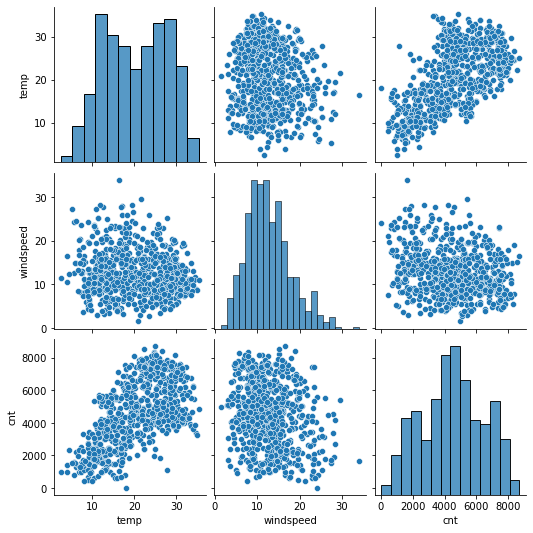

In [94]:
bike_assm = bike[['temp', 'windspeed', 'cnt']]
sns.pairplot(bike_assm)

### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [95]:
y_train_cnt = lm.predict(X_train_lm)

In [96]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

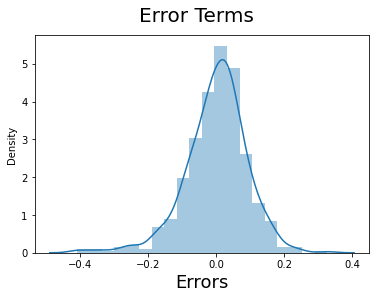

In [97]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [98]:
#scaling on test sets
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

#### Dividing into X_test and y_test

In [99]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [100]:
# Now let's use our final model - Model 8 to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [101]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

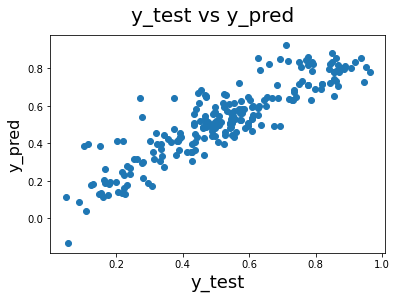

In [102]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [103]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7920853840435127